# Decision Tree  

每個節點會有個條件判定往子節點的方向走, 直到樹葉為止, 樹葉表示類別。

訓練樹的方式:  
拿出每個feature來嘗試分類  
看哪個分的越純, 選定當作該分類節點  

ps:  
$log_2(X)=log(X)÷log(2) = log(X)÷0.301$
***
Information Gain:  
當前的資訊純度:  
$Info(D) = \sum_{i=i}^n -p_i*log_2(p_i)$  
以方式A分完類後資訊純度:   
$Info_A(D) = \sum_{i=i}^n \frac{n_i}{N}*Info(D_i)$  
以方式A分完類後Gain值:  
$ Gain(A) = Info(D) - Info_A(D)$  

EX:  
有3紅2綠個球  
未嘗試分類前的資訊純度  
$Info(D) = I(3,2)= -\frac{3}{5}*log_2(\frac{3}{5}) -\frac{2}{5}*log_2(\frac{2}{5}) = 0.442 + 0.528 = 0.97$  
嘗試以方式A分類, 分成1紅1綠跟2紅1綠  
計算$Info_A(D) = \frac{2}{5}*I(1,1)+\frac{3}{5}*I(2,1) = 0.9508$  
$I(1,1)=-\frac{1}{2}*log_2(\frac{1}{2}) -\frac{1}{2}*log_2(\frac{1}{2}) = 1$  
$I(2,1)=-\frac{2}{3}*log_2(\frac{2}{3}) -\frac{1}{3}*log_2(\frac{1}{3}) = 0.918$  
$Gain(A) = Info(D) - Info_A(D) = 0.97 - 0.9508 = 0.0192$  
嘗試以方式B分類, 分成3紅跟2綠  
計算$Info_B(D) = \frac{3}{5}*I(3,0)+\frac{2}{5}*I(0,2)$  
$I(3,0)=-\frac{3}{3}*log_2(\frac{3}{3}) -\frac{0}{3}*log_2(\frac{0}{3}) = 0$   定義$0log_2(0)=0, log_2(1)=0$  
$I(0,2)=-\frac{0}{2}*log_2(\frac{0}{2}) -\frac{2}{2}*log_2(\frac{2}{2}) = 0$  
$Gain(B) = Info(D) - Info_B(D) = 0.97$  
故方式B較好  
***

Gain ratio:  
因為決策樹傾向將資料分的純度越純越好  
假設有個Attribute每個資料都是獨一無二的, 決策樹容易採用這個Attribute當作節點  
為了避免這種狀況, 計算SplitInfo, 如果遇到上述問題, SplitInfo會變得很大,  
Gain原本很大, 除以SplitInfo就會變小  
假如有個Attribute分Hi(4)/Mid(6)/Lo(4)三級共14個資料  
$SplitInfo_A(D) = -\frac{4}{14}*log_2(\frac{4}{14}) -\frac{6}{14}*log_2(\frac{6}{14}) -\frac{4}{14}*log_2(\frac{4}{14})=0.926$  
$GainRatio(A) = Gain(A)~/~SplitInfo_A(D)$  
***
Gini index:  
有3紅2綠個球  
$Gini(D) = 1-(\frac{3}{5})^2-(\frac{2}{5})^2 = 0.48$  
嘗試以方式A分類, 分成1紅1綠跟2紅1綠  
$Gini_A(D)= \frac{2}{5}*[1-(\frac{1}{2})^2-(\frac{1}{2})^2]+\frac{3}{5}*[1-(\frac{2}{3})^2-(\frac{1}{3})^2]=0.47$  
分成1紅1綠共2個=2/5  
分成2紅1綠共3個=3/5  
1紅1綠=$1-(\frac{1}{2})^2-(\frac{1}{2})^2$  
2紅1綠=$1-(\frac{2}{3})^2-(\frac{1}{3})^2$  
$Gain(A) = Gini(D) - Gini_A(D)$  
***







### Tree Pruning  
因為決策樹是greedy演算法  
通常為了把所有東西都分對,容易樹變得很復雜變得overfitting, 
所以需要有修剪演算法  
- pre-pruning  
事先定義好樹的生長限制, 例如樹的高度(深度)
- post-pruning  
樹完全生成完畢後, 再來檢視修剪的方式, 缺點是需要較多時間將樹完全生成完畢  

**post-pruning:**  
定義$\alpha$為衡量標準, 值越小表示錯誤不會增加太多或剪去樹葉的數量很多  
$\alpha = \frac{修剪節點後錯誤數-修剪節點前錯誤數}{被剪去樹葉數量-1}$  
檢視每個節點, 計算$\alpha$找出最合適裁剪的節點。



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

In [8]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=123456)

In [9]:
#criterion='entropy'
#criterion='gini'
model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=123456)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matches = (predicted==y_test)
acc = matches.sum() / float(len(y_test))
print(metrics.accuracy_score(y_true=y_test, y_pred=predicted));

0.9666666666666667


In [10]:
model.feature_importances_

array([0.01251826, 0.        , 0.59501935, 0.3924624 ])

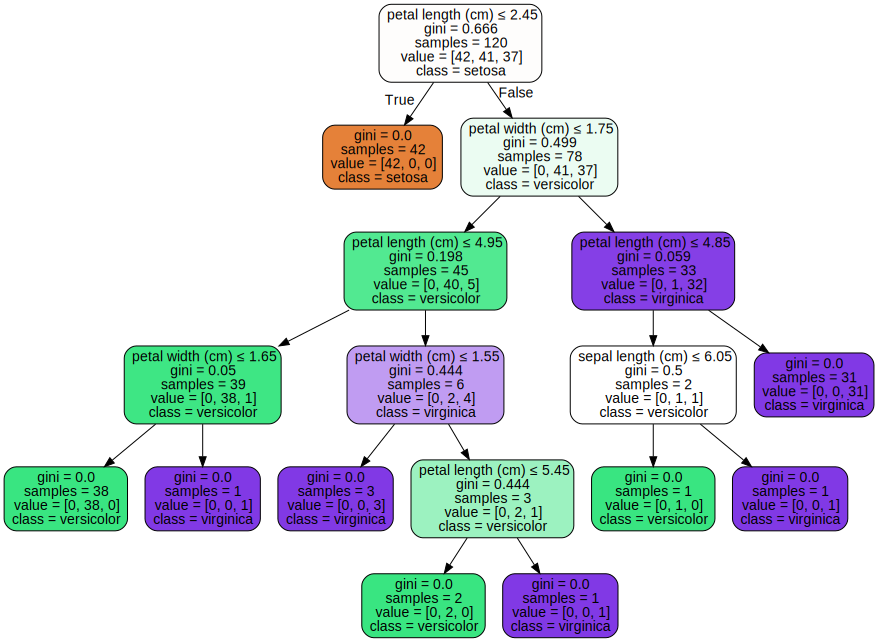

In [39]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, out_file=None, feature_names=data.feature_names, class_names=data.target_names,filled=True, rounded=True, special_characters=True )
#print(dot_data)
graph = graphviz.Source(dot_data)
graph

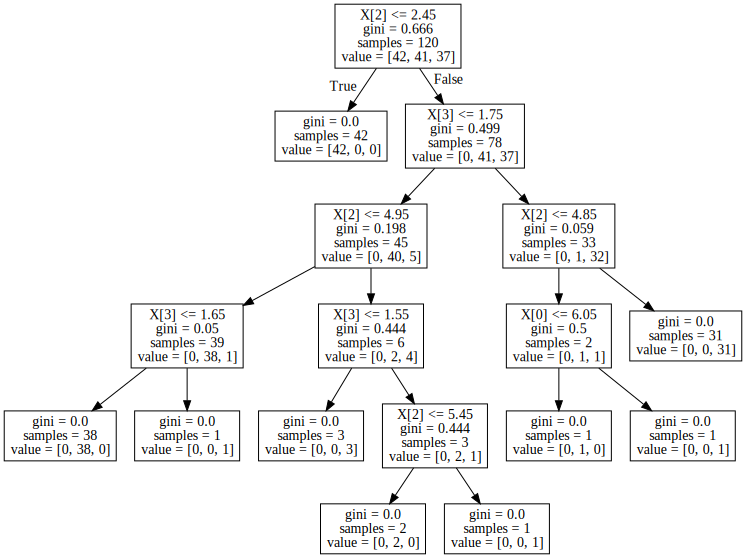

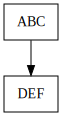

In [24]:
dot_test = '''digraph tree { 
node [shape=box] ;
0 [label="ABC"] 
1 [label="DEF"]
0 -> 1 
}'''
graph_test = graphviz.Source(dot_test)
graph_test